In [65]:
import sklearn
from sklearn.linear_model import LogisticRegressionCV, LinearRegression
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings


In [66]:
## 设置字符集
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

#拦截异常
warnings.filterwarnings(action='ignore',category=ConvergenceWarning)


In [67]:
##读取数据并处理了异常数据
path='datas/breast-cancer-wisconsin.data'
names = ['id', 'Clump Thichness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion',
        'Single Epithelial Cell Size', 'Bare Nuclei' ,'Bland Chromatin', 'Normal Nucleoli ','Mitoses', 'Class']

df = pd.read_csv(path,header=None, names=names)

datas = df.replace('?',np.nan).dropna(how = 'any')  #删除空列
datas.head(3)

,id,Clump Thichness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2


In [68]:
#1.特征提取以及数据分割
## 提取
X = datas[names[1:10]]
Y = datas[names[10]]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.12, random_state=1)

X_train

,Clump Thichness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
320,7,6,3,2,5,10,7,4,6
207,1,1,1,1,1,1,3,1,1
87,3,6,6,6,5,10,6,8,3
565,5,7,10,10,5,10,10,10,1
121,4,2,1,1,2,2,3,1,1
382,3,2,2,2,2,1,3,2,1
387,5,3,3,2,3,1,3,1,1
113,10,10,10,3,10,8,8,1,1
686,1,1,1,1,2,1,1,1,1
613,2,3,1,1,2,1,2,1,1


In [69]:
#2.数据归一化 X进行归一化
ss = StandardScaler()
X_train = ss.fit_transform(X_train)


In [70]:
#3.模型的构建
## penalty:过拟合解决参数l1或者l2
## solver:参数优化方式
### 当penalty 为l1时，参数只能是:libliner（坐标轴下降法）
### nlbfgs和cg都是关于目标函数的二阶泰勒展开
### 当panalty为l2时，参数可以是拟牛顿法:lbfgs，牛顿法变种:newton-cg，seg(minibacth)
#当维度小于10000时，lbfgs方法比较好，维度大于10000时，cg方法比较好，显卡计算的时候，lbfgs和cg都比seg快

##multi_class:分类方式参数,参数可选:ovr(默认)，multinomial：这两中方式在二元分类问题中，效果时一样的，在多元分类中，效果不一样
#class_weight，特征权重参数
###TODO：Logistic回归是一种分类算法，不能应用于回归zhong(也即是说对于传入模型的y值来讲，不能时float类型，必须时int类型)

# help(LogisticRegressionCV)
lr = LogisticRegressionCV(multi_class='ovr',fit_intercept=True, Cs=np.logspace(-2,2,20), cv=2, 
                         penalty='l2', solver='lbfgs',tol=0.01)
re=lr.fit(X_train,Y_train)

In [71]:
#4.模型效果获取
r = re.score(X_train, Y_train)
print('R值(准确率)：',r)
print('稀疏化特征比率:%.2f%%' %(np.mean(lr.coef_.ravel() == 0)*100))
print('参数:',re.coef_)
print('截距:',re.intercept_)
print(re.predict_proba(X_test)) #获取sigmoid函数的返回值

R值(准确率)： 0.968386023295
稀疏化特征比率:0.00%
参数: [[ 1.30973718 -0.07500704  1.02429142  0.78649671 -0.08539711  1.37471496
   1.02193398  0.78527608  0.87076348]]
截距: [-1.13743111]
[[  1.24625735e-07   9.99999875e-01]
 [  3.95940971e-04   9.99604059e-01]
 [  7.78689220e-06   9.99992213e-01]
 [  0.00000000e+00   1.00000000e+00]
 [  3.04871582e-03   9.96951284e-01]
 [  0.00000000e+00   1.00000000e+00]
 [  8.01612805e-05   9.99919839e-01]
 [  7.36003709e-05   9.99926400e-01]
 [  0.00000000e+00   1.00000000e+00]
 [  0.00000000e+00   1.00000000e+00]
 [  1.48971272e-05   9.99985103e-01]
 [  1.18211669e-03   9.98817883e-01]
 [  0.00000000e+00   1.00000000e+00]
 [  1.97196504e-09   9.99999998e-01]
 [  2.16360728e-05   9.99978364e-01]
 [  0.00000000e+00   1.00000000e+00]
 [  3.35596258e-05   9.99966440e-01]
 [  9.59667090e-09   9.99999990e-01]
 [  2.32558879e-05   9.99976744e-01]
 [  1.22424080e-07   9.99999878e-01]
 [  3.36552378e-06   9.99996634e-01]
 [  3.04871582e-03   9.96951284e-01]
 [  2.885138

In [72]:
# ## 5.模型相关信息保存
# # ##引入包
# from sklearn.externals import joblib
# joblib.dump(ss, 'models/logistic/ss.model') #将标准化模型保存
# joblib.dump(lr, 'models/logistic/lr.model') #将模型保存


# ##模型加载
# oss = joblib.load('models/logistic/ss.model')
# olr = joblib.load('models/logistic/lr.model')

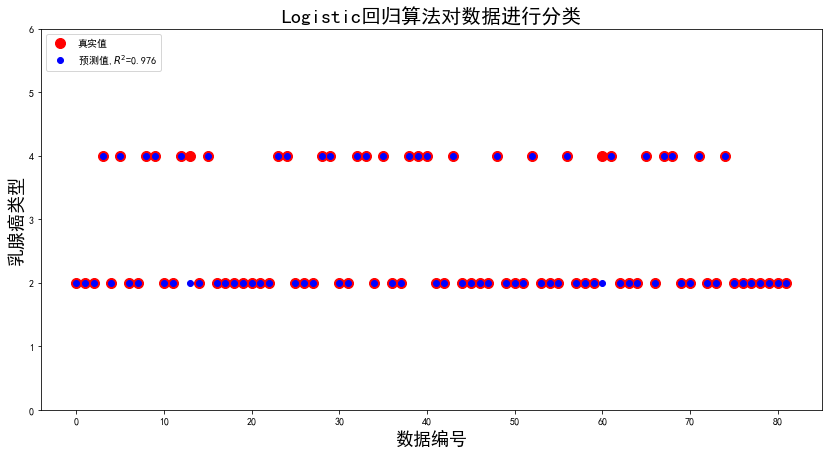

In [73]:
#6.数据预测
X_test = ss.transform(X_test)  #使用模型进行归一化操作
## 
Y_predict = re.predict(X_test)
##

x_len = range(len(X_test))

plt.figure(figsize = (14,7), facecolor='w')
plt.ylim([0,6])
plt.plot(x_len, Y_test,'ro',markersize=10,zorder=3,label='真实值')
plt.plot(x_len, Y_predict, 'bo', markersize=6, zorder=3, label='预测值,$R^2$=%.3f' %re.score(X_test,Y_test))

plt.legend(loc='upper left')
plt.xlabel('数据编号',fontsize=18)
plt.ylabel('乳腺癌类型',fontsize=18)
plt.title('Logistic回归算法对数据进行分类',fontsize=20)
plt.show()
